<a href="https://colab.research.google.com/github/DenisVasil/ScikitLearn/blob/main/scikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = [ i for i in range(10)]
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
y = [2*i for i in range(10)]
print(y)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


Text(0, 0.5, 'y-axis')

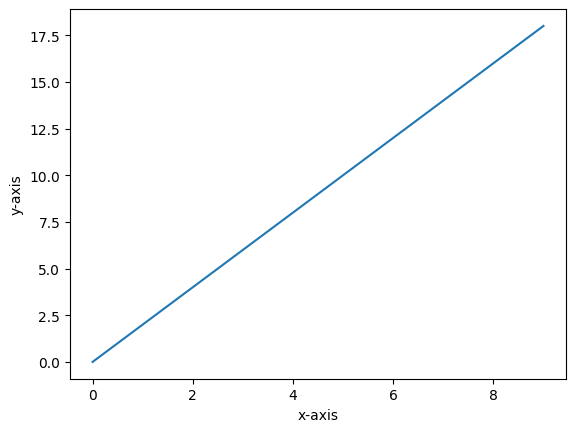

In [ ]:
plt.plot(x, y)
plt.xlabel("x-axis")
plt.ylabel("y-axis")

Text(0, 0.5, 'y-axis')

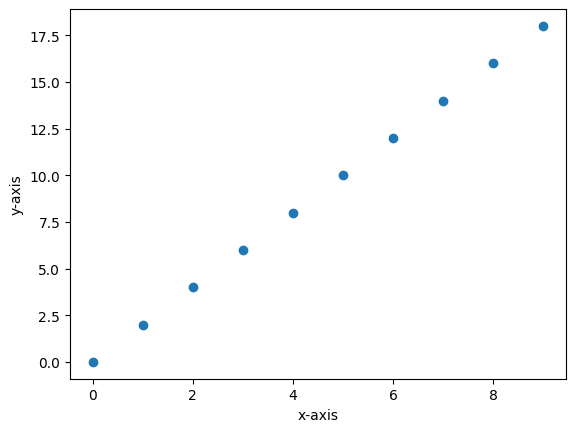

In [ ]:
plt.scatter(x, y)
plt.xlabel("x-axis")
plt.ylabel("y-axis")

In [ ]:
import sklearn
sklearn.__version__

'1.2.2'

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print (X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [ ]:
print(X_iris[0], y_iris[0])

[5.1 3.5 1.4 0.2] 0


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X, y = X_iris[: , :2], y_iris
# Split the dataset into a training and a testing set
#Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(112, 2) (112,)
(38, 2) (38,)


In [ ]:
# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Sepal width')

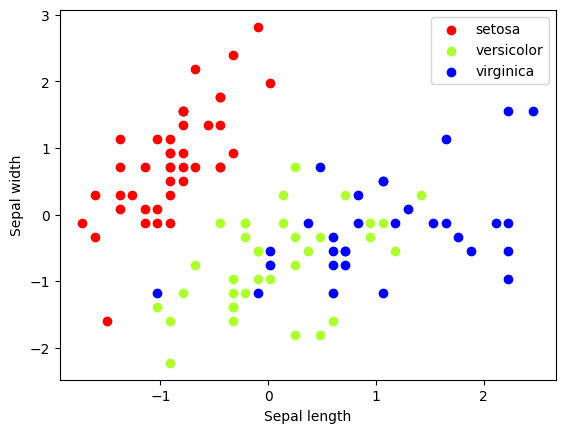

In [ ]:
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
  xs = X_train[:, 0][y_train == i]
  ys = X_train[:, 1][y_train == i]
  plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[-27.88326064   6.91317178]
 [  0.65005778  -6.47015887]
 [  9.01564768   4.39260263]]
[-10.90524677  -3.4686893   -5.25154713]


In [ ]:
print(clf.predict(scaler.transform([[4.7, 3.1]])))

[2]


In [ ]:
print(clf.decision_function(scaler.transform([[4.7, 3.1]])))

[[-120.52573925  -20.47091022   50.73906511]]


In [ ]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred))

0.7678571428571429


In [ ]:
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5


## Feature engineering

In [ ]:
import pandas as pd
df = pd.read_csv("/content/housing.csv")
df = df.dropna()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Preprocessing

Use ColumnTransformer to apply different preprocessing to different columns:

* select from DataFrame columns by name
* passthrough or drop unspecified columns

In [ ]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain', nrows=6)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
cols = ['Fare', 'Embarked', 'Sex', 'Age']
X = df[cols]

In [ ]:
X

,Fare,Embarked,Sex,Age
0,7.2500,S,male,22.0
1,71.2833,C,female,38.0
2,7.9250,S,female,26.0
3,53.1000,S,female,35.0
4,8.0500,S,male,35.0
5,8.4583,Q,male,NaN


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [ ]:
ohe = OneHotEncoder()
imp = SimpleImputer()

In [ ]:
ct = make_column_transformer(
    (ohe, ["Embarked", "Sex"]),
    (imp, (["Age"])),
    remainder="passthrough" # include remaining column (Fare) in the output
)

In [ ]:
ct.fit_transform(X)
# column order: Embarked (3 columns), Sex (2 columns), Age (1 column), Fare (1 column)

array([[ 0.    ,  0.    ,  1.    ,  0.    ,  1.    , 22.    ,  7.25  ],
       [ 1.    ,  0.    ,  0.    ,  1.    ,  0.    , 38.    , 71.2833],
       [ 0.    ,  0.    ,  1.    ,  1.    ,  0.    , 26.    ,  7.925 ],
       [ 0.    ,  0.    ,  1.    ,  1.    ,  0.    , 35.    , 53.1   ],
       [ 0.    ,  0.    ,  1.    ,  0.    ,  1.    , 35.    ,  8.05  ],
       [ 0.    ,  1.    ,  0.    ,  0.    ,  1.    , 31.2   ,  8.4583]])

## Ways to selet columns with ColumnTransformer

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

In [ ]:
ohe = OneHotEncoder()

In [ ]:
ct = make_column_transformer((ohe, ['Embarked', 'Sex']))
ct = make_column_transformer((ohe, [1, 2]))
ct = make_column_transformer((ohe, slice(1 , 3)))
ct = make_column_transformer((ohe, [False, True, True, False]))
ct = make_column_transformer((ohe, make_column_selector(pattern="E|S")))
ct = make_column_transformer((ohe, make_column_selector(dtype_include=object)))
ct = make_column_transformer((ohe, make_column_selector(dtype_exclude="number")))

In [ ]:
## one-hot encode Embarked and Sex (and drop all other columns)
ct.fit_transform(X)

array([[0., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1.]])

## Two common ways to encode categorical features:
* OneHotEncoder for unordered (nominal) data
* OrdinalEncoder for ordered (ordinal) data

In [ ]:
import pandas as pd
X = pd.DataFrame({'Shape':['square', 'square', 'oval', 'circle'],
                  'Class': ['third', 'first', 'second', 'third'],
                  'Size': ['S', 'S', 'L', 'XL']})

In [ ]:
X

,Shape,Class,Size
0,square,third,S
1,square,first,S
2,oval,second,L
3,circle,third,XL


In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
# left-to-right column order is alphabetical (circle, oval, square)
ohe = OneHotEncoder(sparse_output=False)
ohe.fit_transform(X[["Shape"]])

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
# category ordering (within each feature) has to be defined
oe = OrdinalEncoder(categories=[["first", "second", "third"], ["S", "M", "L", "XL"]])
oe.fit_transform(X[["Class", "Size"]])

array([[2., 0.],
       [0., 0.],
       [1., 2.],
       [2., 3.]])

# Handling unknown categories with OneHotEncoder by encoding them as zeros

Set handle_unknown='ignore' to encode new categories as all zeros.

In [ ]:
import pandas as pd
X = pd.DataFrame({'col':['A', 'B', 'C', 'B']})
X_new = pd.DataFrame({'col':['A', 'C', 'D']})

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder(sparse=False, handle_unknown="ignore")

In [ ]:
X

,col
0,A
1,B
2,C
3,B


In [ ]:
ohe.fit_transform(X[["col"]])
# three columns represent categories A, B, and C

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [ ]:
# category D was not learned by OneHotEncoder during the "fit" step
X_new

,col
0,A
1,C
2,D


In [ ]:
# category D is encoded as all zeros ("other" category)
ohe.transform(X_new[["col"]])

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

# ScikitLearn pipelines to chain together multiple steps

In [ ]:
import pandas as pd
import numpy as np
train = pd.DataFrame({'feat1':[10, 20, np.nan, 2], 'feat2':[25., 20, 5, 3], 'label':['A', 'A', 'B', 'B']})
test = pd.DataFrame({'feat1':[30., 5, 15], 'feat2':[12, 10, np.nan]})

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [ ]:
imputer = SimpleImputer()
clf = LogisticRegression()

In [ ]:
# 2-step pipeline: impute missing values, then pass the results to the classifier
pipe = make_pipeline(imputer, clf)

In [ ]:
train

,feat1,feat2,label
0,10.0,25.0,A
1,20.0,20.0,A
2,NaN,5.0,B
3,2.0,3.0,B


In [ ]:
test

,feat1,feat2
0,30.0,12.0
1,5.0,10.0
2,15.0,NaN


In [ ]:
features = ["feat1", "feat2"]

In [ ]:
X, y = train[features], train["label"]
X_new = test[features]

In [ ]:
# pipeline applies the imputer to X before fitting the classifier
pipe.fit(X,y)
# pipeline applies the imputer to X before fitting the classifier
pipe.predict(X_new)

array(['A', 'B', 'A'], dtype=object)

# Adding a missing indicator to encode "missingness" as a feature

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
X = pd.DataFrame({'Age':[20, 30, 10, np.nan, 10]})
X

,Age
0,20.0
1,30.0
2,10.0
3,NaN
4,10.0


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer()
imputer.fit_transform(X)

array([[20. ],
       [30. ],
       [10. ],
       [17.5],
       [10. ]])

In [ ]:
# impute the mean and add an indicator matrix
# (second column indicats where the missing walus were)
imputer = SimpleImputer(add_indicator=True)
imputer.fit_transform(X)

array([[20. ,  0. ],
       [30. ,  0. ],
       [10. ,  0. ],
       [17.5,  1. ],
       [10. ,  0. ]])

# Seting a "random_state" to make the code reproducible
 Ensures that a "random" process will output the same results every time, which makes the code reproducible.

In [ ]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain', nrows=6)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
cols = ["Fare", "Embarked", "Sex"]
X = df[cols]
y = df["Survived"]

In [ ]:
X

,Fare,Embarked,Sex
0,7.2500,S,male
1,71.2833,C,female
2,7.9250,S,female
3,53.1000,S,female
4,8.0500,S,male
5,8.4583,Q,male


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# any positive integer can be used for the random_state value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=1)
X_train

,Fare,Embarked,Sex
0,7.2500,S,male
3,53.1000,S,female
5,8.4583,Q,male


In [ ]:
# using the SAME random_state value results in the SAME random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=1)
X_train

,Fare,Embarked,Sex
0,7.2500,S,male
3,53.1000,S,female
5,8.4583,Q,male


In [ ]:
# using a DIFFERENT random_state value results in a DIFFERENT random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
X_train

,Fare,Embarked,Sex
2,7.9250,S,female
5,8.4583,Q,male
0,7.2500,S,male


 # KNNImputer or IterativeImputer
 Both are multivariate approaches (they take other features into account

In [1]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain', nrows=6)

In [2]:
cols = ['SibSp', 'Fare', 'Age']
X = df[cols]
X

,SibSp,Fare,Age
0,1,7.2500,22.0
1,1,71.2833,38.0
2,0,7.9250,26.0
3,1,53.1000,35.0
4,0,8.0500,35.0
5,0,8.4583,NaN


In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# predicts missing values using regression model
# based on rows without missng values

In [4]:
impute_it = IterativeImputer()
impute_it.fit_transform(X)

array([[ 1.        ,  7.25      , 22.        ],
       [ 1.        , 71.2833    , 38.        ],
       [ 0.        ,  7.925     , 26.        ],
       [ 1.        , 53.1       , 35.        ],
       [ 0.        ,  8.05      , 35.        ],
       [ 0.        ,  8.4583    , 28.50639495]])

In [9]:
from sklearn.impute import KNNImputer
# evaluats closest rows and averages values in the column with the missing value
# from these rows

In [8]:
impute_knn = KNNImputer(n_neighbors=2) # number of closest rows
impute_knn.fit_transform(X)

array([[ 1.    ,  7.25  , 22.    ],
       [ 1.    , 71.2833, 38.    ],
       [ 0.    ,  7.925 , 26.    ],
       [ 1.    , 53.1   , 35.    ],
       [ 0.    ,  8.05  , 35.    ],
       [ 0.    ,  8.4583, 30.5   ]])

# Pipeline vs make_pipeline
Pipeline requires naming of steps, make_pipeline does not
Same applies to ColumnTransformer vs make_column_transformer

In [11]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain', nrows=6)

In [12]:
cols = ['Embarked', 'Sex', 'Age', 'Fare']
X = df[cols]
X

,Embarked,Sex,Age,Fare
0,S,male,22.0,7.2500
1,C,female,38.0,71.2833
2,S,female,26.0,7.9250
3,S,female,35.0,53.1000
4,S,male,35.0,8.0500
5,Q,male,NaN,8.4583


In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [14]:
ohe = OneHotEncoder()
imp = SimpleImputer()
clf = LogisticRegression()

In [15]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [17]:
ct = make_column_transformer(
    (ohe, ['Embarked', 'Sex']),
    (imp, ['Age']),
    remainder = 'passthrough'
)

In [20]:
pipe = make_pipeline(ct, clf)

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
ct = ColumnTransformer(
    [('encoder', ohe, ['Embarked', 'Sex']),
     ('imputer', imp, ['Age'])],
    remainder='passthrough')

In [24]:
pipe = Pipeline([('preprocessor', ct), ('classifier', clf)])

# Examining the intermediate steps in a Pipeline
By using the "named_steps" attribute:

pipe.named_steps.STEP_NAME.ATTRIBUTE

In [25]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain', nrows=6)
df = df[['Age', 'Pclass', 'Survived']]
df

,Age,Pclass,Survived
0,22.0,3,0
1,38.0,1,1
2,26.0,3,1
3,35.0,1,1
4,35.0,3,0
5,NaN,3,0


In [26]:
X = df[['Age', 'Pclass']]
y = df['Survived']

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [28]:
pipe = make_pipeline(SimpleImputer(), LogisticRegression())

In [30]:
pipe.fit(X,y);
# use semicolon to suppress output in IPython

In [32]:
# display the imputation values for "Age" and "Pclass"
pipe.named_steps.simpleimputer.statistics_

array([31.2       ,  2.33333333])

In [33]:
# display the model coefficients for "Age" and "Pclass"
pipe.named_steps.logisticregression.coef_

array([[ 0.03232238, -0.83741131]])

# HistGradientBoostingClassifier natively supports missing values
Four options for handling missing values (NaNs):

 * Drop rows containing NaNs
 * Drop columns containing NaNs
 * Fill NaNs with imputed values
 * Use a model that natively handles NaNs

In [34]:
import pandas as pd
train = pd.read_csv('http://bit.ly/kaggletrain')
test = pd.read_csv('http://bit.ly/kaggletest', nrows=175)

In [35]:
train = train[['Survived', 'Age', 'Fare', 'Pclass']]
test = test[['Age', 'Fare', 'Pclass']]

In [36]:
# count the number of NaNs in each column
train.isna().sum()

Survived      0
Age         177
Fare          0
Pclass        0
dtype: int64

In [37]:
test.isna().sum()

Age       36
Fare       1
Pclass     0
dtype: int64

In [38]:
label = train.pop('Survived')

In [39]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [40]:
clf = HistGradientBoostingClassifier()

In [43]:
# no errors, despite NaNs in train and test
clf.fit(train, label)
clf.score(train, label)

0.8832772166105499